<a href="https://colab.research.google.com/github/joser834/Data-Science/blob/master/MS_DataScience/Text%20Mining/TweetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

## Most Popular Users in Tweets

In [0]:
nms = ['sentiment_value', 'tw_id', 'tw_date', 'no_query', 'user', 'tweet']
tweets = pd.read_csv('/content/drive/My Drive/2019/Galileo/3er Trimestre/Text Mining & Image Recognition/Lab2/training.1600000.processed.noemoticon.csv',
                     encoding = 'latin-1', names = nms)

In [13]:
tweets.head()

,sentiment_value,tw_id,tw_date,no_query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [0]:
user_list = [st for row in tweets['tweet'].str.findall(r'\@\w+\b') for st in row]
user_list = pd.DataFrame(user_list, columns = ['user'])

In [15]:
top3users = user_list.groupby('user')['user'] \
  .count() \
  .reset_index(name='count') \
  .sort_values(['count'], ascending=False) \
  .head(3)
print(top3users)

               user  count
266369  @mileycyrus   4500
337120    @tommcfly   3887
175740    @ddlovato   3467


In [16]:
top3users = np.array(top3users['user'])
print(top3users)

['@mileycyrus' '@tommcfly' '@ddlovato']


In [0]:
def build_corpus(text, df, vec):
  temp = df[df[vec].str.contains(text)]
  temp = temp[['tweet', 'tw_id', 'tw_date']]
  temp['tw_len'] = temp['tweet'].astype(str).str.len()
  return(temp)

In [0]:
df1 = build_corpus(top3users[0], tweets, 'tweet')
df2 = build_corpus(top3users[1], tweets, 'tweet')
df3 = build_corpus(top3users[2], tweets, 'tweet')

### Corpus 1: @mileycyrus

In [19]:
df1.head()

,tweet,tw_id,tw_date,tw_len
1021,@mileycyrus hahaha dont be like that one time ...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107
2014,"@mileycyrus i have the same problem, but it's ...",1468286517,Tue Apr 07 00:45:20 PDT 2009,137
2073,@mileycyrus I guess counting sheep didn't work...,1468297110,Tue Apr 07 00:49:07 PDT 2009,72
2080,@mileycyrus I would too if it meant spending a...,1468298918,Tue Apr 07 00:49:44 PDT 2009,100
2156,@mileycyrus AWWW u seriously have the cutest d...,1468318249,Tue Apr 07 00:56:41 PDT 2009,112


### Corpus 2: @tommcfly

In [20]:
df2.head()

,tweet,tw_id,tw_date,tw_len
1690,@tommcfly hey saw u guys play @ pushover..didn...,1468210813,Tue Apr 07 00:19:09 PDT 2009,138
1789,@tommcfly Good morning Tom! Why can't I send y...,1468233211,Tue Apr 07 00:26:52 PDT 2009,131
2514,@tommcfly did you know that johnsons baby use ...,1468391638,Tue Apr 07 01:23:07 PDT 2009,96
3029,"@dougiemcfly @tommcfly good morning guys, how ...",1468502040,Tue Apr 07 02:03:41 PDT 2009,108
3524,"@tommcfly hey, no chance of adding brighton or...",1468618787,Tue Apr 07 02:46:02 PDT 2009,131


### Corpus 3: @ddlovato

In [21]:
df3.head()

,tweet,tw_id,tw_date,tw_len
460,@ddlovato @David_Henrie ummmmm i cant find it.,1467929230,Mon Apr 06 22:51:34 PDT 2009,47
573,@ddlovato Do you hate us?? Please don't,1467953367,Mon Apr 06 22:58:30 PDT 2009,40
7032,@ddlovato Wish that i could see it.. Thats th...,1469661950,Tue Apr 07 07:02:58 PDT 2009,96
7089,"@ddlovato hey demi, wen are you and selena gon...",1469674492,Tue Apr 07 07:05:11 PDT 2009,79
8611,@ddlovato ahhhh i wish i could go to the dalla...,1548280868,Fri Apr 17 20:31:31 PDT 2009,85


#### Converting the pandas series to a single string for each user

In [0]:
string1 = ' '.join(df1['tweet'])
string2 = ' '.join(df2['tweet'])
string3 = ' '.join(df3['tweet'])

#### Normalizing the string to remove uppercase words, special characters, and single character words

In [0]:
def normalize(text):
  text = text.lower()
  text = text.replace('.', '')
  text = text.replace(',', '')
  text = text.replace('!', '')
  text = text.replace('á', 'a')
  text = text.replace('é', 'e')
  text = text.replace('í', 'i')
  text = text.replace('ó', 'o')
  text = text.replace('ú', 'u')
  text = text.replace('?', '')
  text = text.replace(')', '')
  text = text.replace('(', '')
  text = text.replace(':', '')
  text = text.replace('/', '')
  text = text.replace("'", "")
  text = text.replace(';', '')
  text = text.replace('@', '')
  text = re.sub(r"\b[a-z]{1,2}\b", "", text)
  text = re.sub(r"\b(miley|mileycyrus|cyrus)+\b", "", text)
  text = re.sub(r"\b(tom|tommcfly|mcfly)+\b", "", text)
  text = re.sub(r"\b(ddlovato|demi|demilovato|lovato)+\b", "", text)
  text = re.sub(top3users[0], "", text)
  text = re.sub(top3users[1], "", text)
  text = re.sub(top3users[2], "", text)
  return(text)

In [0]:
string1_norm = normalize(string1)
string2_norm = normalize(string2)
string3_norm = normalize(string3)

#### Getting the unique list for all words in string

In [0]:
string1_unique = list(set(string1_norm.split()))
string2_unique = list(set(string2_norm.split()))
string3_unique = list(set(string3_norm.split()))

In [26]:
##Example of the unique list for @ddlovato
string3_unique[0:10]

['huh',
 'lose',
 '******',
 'hate',
 'httpbitlyqrfa4',
 'cokecome',
 'close',
 'program',
 'cross',
 'soso']

#### Counting all occurencies of each word in the previous list

In [0]:
counts1 = []
for i in string1_unique:
  counts1.append(string1_norm.count(i))
  
counts2 = []
for i in string2_unique:
  counts2.append(string2_norm.count(i))
  
counts3 = []
for i in string3_unique:
  counts3.append(string3_norm.count(i))

In [0]:
df1_final = {
    'word' : string1_unique,
    'count' : counts1
}
df1_final = pd.DataFrame(df1_final)

df2_final = {
    'word' : string2_unique,
    'count' : counts2
}
df2_final = pd.DataFrame(df2_final)

df3_final = {
    'word' : string3_unique,
    'count' : counts3
}
df3_final = pd.DataFrame(df3_final)

### Most popular words (top 10) for each user without stopwords

In [0]:
df1_final = df1_final[~df1_final['word'].isin(stop_words)].sort_values(['count'], ascending=False)
df2_final = df2_final[~df2_final['word'].isin(stop_words)].sort_values(['count'], ascending=False)
df3_final = df3_final[~df3_final['word'].isin(stop_words)].sort_values(['count'], ascending=False)

In [30]:
df1_final.head(10)

,word,count
3025,lov,989
958,love,971
2693,hat,929
4768,com,913
671,wit,845
2364,tha,744
5387,-,732
4222,ome,675
4828,&,645
749,pic,603


In [31]:
df2_final.head(10)

,word,count
4578,hat,827
1672,com,644
1966,ere,588
4828,day,541
642,lov,530
3390,love,525
3822,please,505
429,hav,503
849,ill,492
1888,&,463


In [32]:
df3_final.head(10)

,word,count
4570,hat,810
3333,tha,732
3428,love,673
1903,&,579
1247,ant,558
2508,wit,493
412,hav,428
837,ill,404
4056,3,347
4820,day,338


### WordCloud for each user

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

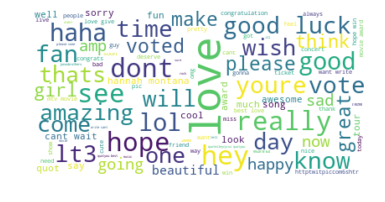

In [34]:
# Start with one review:
text = string1_norm

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

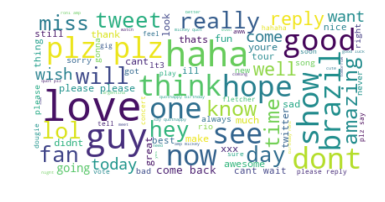

In [35]:
# Start with one review:
text = string2_norm

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

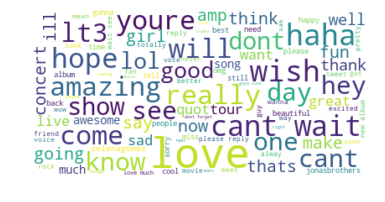

In [36]:
# Start with one review:
text = string3_norm

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()